# Notebook to run GARPOS on QC data

### Step 1.  Use onboard, realtime positions only.  

In [1]:
from es_sfgtools.data_mgmt.data_handler import DataHandler
from es_sfgtools.utils.archive_pull import load_site_metadata, load_vessel_metadata

In [2]:

network_name = "cascadia-gorda"
site_name = "NTH1"
vessel = "1126"
year = "2025"
campaign_name = f"{year}_A_{vessel}"
data_dir = f"/Users/mikegottlieb/data/sfg"

metadata_file = f"{data_dir}/{network_name}/{site_name}/{site_name}.json"
site_meta = load_site_metadata(station=site_name, network=network_name, local_path= metadata_file)

vessel_meta = load_vessel_metadata(vessel_code=vessel)

for campaign in site_meta.campaigns:
    if campaign.name == campaign_name:
        s = campaign.start
        e = campaign.end

dh = DataHandler(directory=data_dir)
dh.change_working_station(network=network_name, station=site_name, campaign=campaign_name, start_date=s, end_date=e)

Loading vessel metadata from https://data.earthscope.org/archive/seafloor/metadata/vessels/1126.json
Loading vessel metadata from https://data.earthscope.org/archive/seafloor/metadata/vessels/1126.json
Built directory structure for cascadia-gorda NTH1 2025_A_1126
Creating TileDB arrays for NTH1
Consolidating existing TileDB arrays for NTH1
Changed working station to cascadia-gorda NTH1 2025_A_1126


In [3]:
gh = dh.get_garpos_handler(site_data=site_meta)

Campaign 2025_A_1126 set. Current campaign directory: /Users/mikegottlieb/data/sfg/cascadia-gorda/NTH1/2025_A_1126/GARPOS
Garpos Handler initialized with working directory: /Users/mikegottlieb/data/sfg/cascadia-gorda/NTH1/2025_A_1126/GARPOS


In [4]:
ctd_path = f"{dh.campaign_data_dir}/NTH1_2025_CTD_fit"
gh.load_sound_speed_data(local_ctd=ctd_path)

Using local CTD file found at /Users/mikegottlieb/data/sfg/cascadia-gorda/NTH1/2025_A_1126/NTH1_2025_CTD_fit, converting to sound speed profile..
Converted /Users/mikegottlieb/data/sfg/cascadia-gorda/NTH1/2025_A_1126/NTH1_2025_CTD_fit to sound velocity profile at /Users/mikegottlieb/data/sfg/cascadia-gorda/NTH1/2025_A_1126/GARPOS/svp.csv


In [5]:
# Use the shotdata directly from the PIN files
gh.shotdata = dh.qcdata_tdb_pre
gh.prep_shotdata(overwrite=True)

Shot data saved to /Users/mikegottlieb/data/sfg/cascadia-gorda/NTH1/2025_A_1126/GARPOS/shotdata
Filtered 0 records from shot data based on filtering criteria: {'acoustic_filters': {'enabled': False, 'level': 'OK'}, 'ping_replies': {'enabled': False, 'min_replies': 3}, 'max_distance_from_center': {'enabled': True, 'max_distance_m': 150}, 'pride_residuals': {'enabled': False, 'max_residual_mm': 50}}
Preparing shot data
Shot data prepared and saved to /Users/mikegottlieb/data/sfg/cascadia-gorda/NTH1/2025_A_1126/GARPOS/2025_A_1126_1/2025_A_1126_1_circledrive.csv
Shot data saved to /Users/mikegottlieb/data/sfg/cascadia-gorda/NTH1/2025_A_1126/GARPOS/shotdata
Removed 23 records > 150m horizontal distance from array center
Filtered 23 records from shot data based on filtering criteria: {'acoustic_filters': {'enabled': False, 'level': 'OK'}, 'ping_replies': {'enabled': False, 'min_replies': 3}, 'max_distance_from_center': {'enabled': True, 'max_distance_m': 150}, 'pride_residuals': {'enabled': 

In [6]:
run_id = 1
survey_id = f"{campaign_name}_3"

gh.run_garpos(run_id=run_id, survey_id=survey_id, override=True)

Running GARPOS model. Run ID: 1
Running GARPOS model for survey 2025_A_1126_3. Run ID: 1
Running GARPOS model for survey 2025_A_1126_3. Run ID: 1
Current survey set to: 2025_A_1126_3 2025-08-19 15:00:00 - 2025-08-20 09:30:00
Running GARPOS model for NTH1, 2025_A_1126_3. Run ID: 1


            suffix  lamb0  lgrad  mu_t  mu_m
0  2025_A_1126_3_1    1.0    0.1   0.0   0.5
Inversion loop 001, RMS(TT) =  28.038272 ms, used_shot =  95.7%, reject =   56, Max(dX) =    10.0000, Hgt =  -1236.553
Inversion loop 002, RMS(TT) =  26.887905 ms, used_shot =  94.3%, reject =   73, Max(dX) =    10.0000, Hgt =  -1236.553
Inversion loop 003, RMS(TT) =  25.656937 ms, used_shot =  92.5%, reject =   97, Max(dX) =    10.0000, Hgt =  -1236.553
Inversion loop 004, RMS(TT) =  24.173314 ms, used_shot =  89.2%, reject =  139, Max(dX) =    10.0000, Hgt =  -1236.553
Inversion loop 005, RMS(TT) =  22.596803 ms, used_shot =  85.4%, reject =  188, Max(dX) =    10.0000, Hgt =  -1236.553
Inversion loop 006, RMS(TT) =  21.089650 ms, used_shot =  82.1%, reject =  231, Max(dX) =    10.0000, Hgt =  -1236.553
Inversion loop 007, RMS(TT) =  19.840249 ms, used_shot =  80.2%, reject =  256, Max(dX) =    10.0000, Hgt =  -1236.553
Inversion loop 008, RMS(TT) =  18.756356 ms, used_shot =  79.0%, reject =  27

Processing GARPOS results
GARPOS results processed, returning results tuple


Inversion loop 074, RMS(TT) =   0.271409 ms, used_shot =  19.6%, reject = 1038, Max(dX) =     0.0011, Hgt =  -1236.553
 ABIC =        2202.645678  misfit =  0.938 2025_A_1126_3_1
/Users/mikegottlieb/data/sfg/cascadia-gorda/NTH1/2025_A_1126/GARPOS/2025_A_1126_3/results/NTH1.2025_A_11262025_A_1126_3_1-res.dat


Current survey set to: 2025_A_1126_3 2025-08-19 15:00:00 - 2025-08-20 09:30:00


Delta Center Position
Array :  East -0.375 m, North -4.631 m, Up 0.000 m 
TSP M5209 : East -0.140 m, North 0.244 m, Up 0.354 m 
TSP M5210 : East -0.206 m, North 0.264 m, Up 0.347 m 
TSP M5211 : East -0.247 m, North 0.283 m, Up 0.382 m 



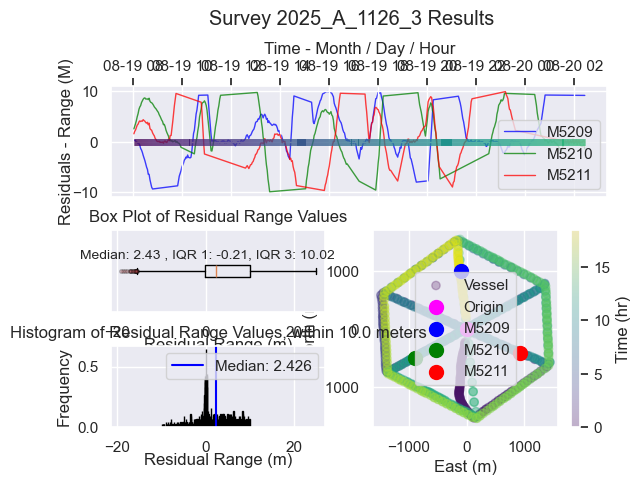

In [7]:
run_id = 1
survey_id = f"{campaign_name}_3"
gh.plot_ts_results(survey_id=survey_id, run_id=run_id)

Current survey set to: 2025_A_1126_3 2025-08-19 15:00:00 - 2025-08-20 09:30:00


,Unnamed: 0,SET,LN,MT,TT,ResiTT,TakeOff,gamma,flag,ST,...,dV0,gradV1e,gradV1n,gradV2e,gradV2n,dV,LogResidual,ResiRange,dVO,time
0,0,S01,L01,M5209,2.373781,0.000324,45.994336,-0.013532,False,1.755616e+09,...,-20.044613,0.0,0.0,0.0,0.0,-20.044613,0.000137,0.239976,0.0,2025-08-19 08:02:08
1,1,S01,L01,M5210,2.063541,0.003444,36.841738,-0.013533,True,1.755616e+09,...,-20.044854,0.0,0.0,0.0,0.0,-20.044854,0.001669,2.550407,0.0,2025-08-19 08:02:08
2,2,S01,L01,M5211,2.122962,0.002127,38.980222,-0.013532,True,1.755616e+09,...,-20.044627,0.0,0.0,0.0,0.0,-20.044627,0.001002,1.575337,0.0,2025-08-19 08:02:08
3,3,S01,L01,M5209,2.393914,0.000408,46.476144,-0.013327,False,1.755616e+09,...,-19.740529,0.0,0.0,0.0,0.0,-19.740529,0.000170,0.302062,0.0,2025-08-19 08:04:08
4,4,S01,L01,M5210,2.059108,0.004134,36.669787,-0.013327,True,1.755616e+09,...,-19.740801,0.0,0.0,0.0,0.0,-19.740801,0.002008,3.061716,0.0,2025-08-19 08:04:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,1286,S01,L01,M5210,2.277730,-0.000805,43.819942,-0.011830,True,1.755682e+09,...,-17.523578,0.0,0.0,0.0,0.0,-17.523578,-0.000353,-0.596179,0.0,2025-08-20 02:25:17
1287,1287,S01,L01,M5211,2.282160,0.000302,43.904134,-0.011831,False,1.755682e+09,...,-17.523870,0.0,0.0,0.0,0.0,-17.523870,0.000132,0.223859,0.0,2025-08-20 02:25:17
1288,1288,S01,L01,M5209,1.993126,0.012399,33.749227,-0.012257,True,1.755682e+09,...,-18.155896,0.0,0.0,0.0,0.0,-18.155896,0.006221,9.182625,0.0,2025-08-20 02:27:32
1289,1289,S01,L01,M5210,2.258034,-0.001891,43.284896,-0.012258,True,1.755682e+09,...,-18.156799,0.0,0.0,0.0,0.0,-18.156799,-0.000837,-1.400581,0.0,2025-08-20 02:27:32


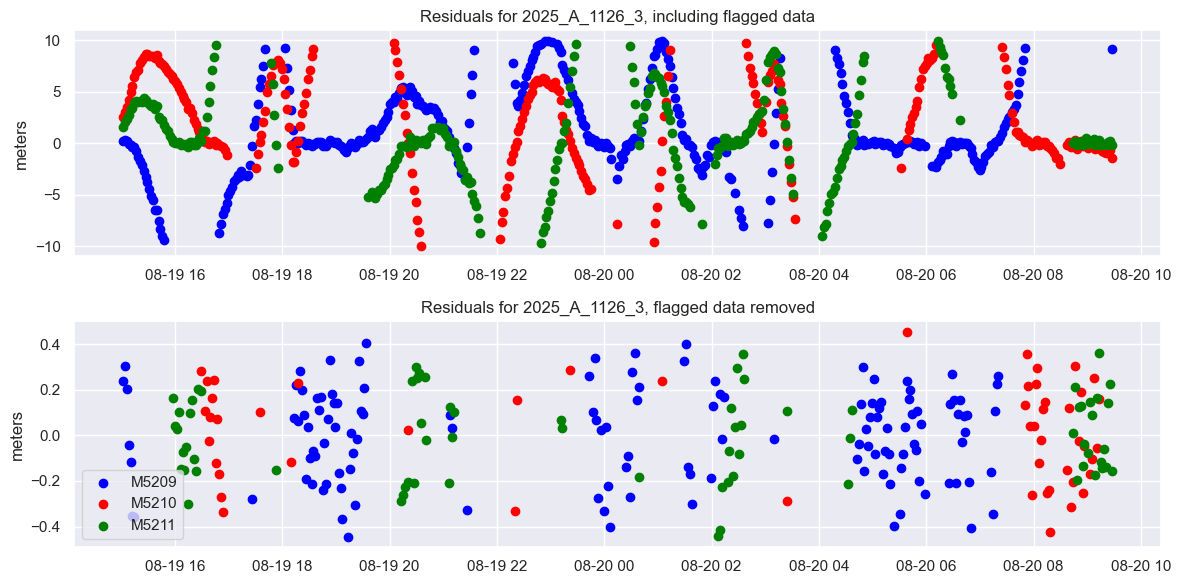

In [28]:
import matplotlib.pyplot as plt
import json
from es_sfgtools.modeling.garpos_tools.schemas import (
    GarposFixed,
    InversionParams,
    GarposInput,
    GPTransponder,
    GPATDOffset,
    GPPositionENU,
    GPPositionLLH,
    ObservationData
)
import pandas as pd
from datetime import datetime

def plot_garpos_residuals(gh, survey_id, run_id):
    fig, axs = plt.subplots(2, 1, figsize=(12, 6))
    gh.set_survey(survey_id)
    obsfile_path = gh.get_obsfile_path(gh.current_survey.id)

    res_filter = 10
    RESULTS_DIR_NAME = "results"
    results_dir = obsfile_path.parent / RESULTS_DIR_NAME
    results_path = results_dir / f"_{run_id}_results.json"
    with open(results_path, "r") as f:
        results = json.load(f)
        garpos_results = GarposInput(**results)
        arrayinfo = garpos_results.delta_center_position
    
    results_df_raw = pd.read_csv(garpos_results.shot_data)
    results_df_raw = ObservationData.validate(results_df_raw, lazy=True)
    results_df_raw["time"] = results_df_raw.ST.apply(
        lambda x: datetime.fromtimestamp(x)
    )
    df_filter = results_df_raw["ResiRange"].abs() < res_filter
    results_df = results_df_raw[df_filter]
    unique_ids = results_df["MT"].unique()
    colors = ['blue', 'red', 'green']
    for i, id in enumerate(unique_ids):
        transponder_df = results_df[results_df["MT"]==id]
        axs[0].scatter(x=pd.to_datetime(transponder_df.RT, unit='s'), y=transponder_df.ResiRange, c=colors[i], label=id)
        used_df = transponder_df[transponder_df["flag"]==False]
        axs[1].scatter(x=pd.to_datetime(used_df.RT, unit='s'), y=used_df.ResiRange, c=colors[i], label=id)
    axs[0].set_title(f"Residuals for {survey_id}, including flagged data")
    for ax in axs:
        ax.set_ylabel('meters')
    axs[1].set_title(f"Residuals for {survey_id}, flagged data removed")
    axs[1].legend()
    fig.tight_layout()
    return results_df

run_id = 1
survey_id = f"{campaign_name}_3"

plot_garpos_residuals(gh, survey_id=survey_id, run_id=run_id)
    